In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv("stocks.csv")  # Change path if needed


In [9]:
data['Date'] = pd.to_datetime(data['Date'])


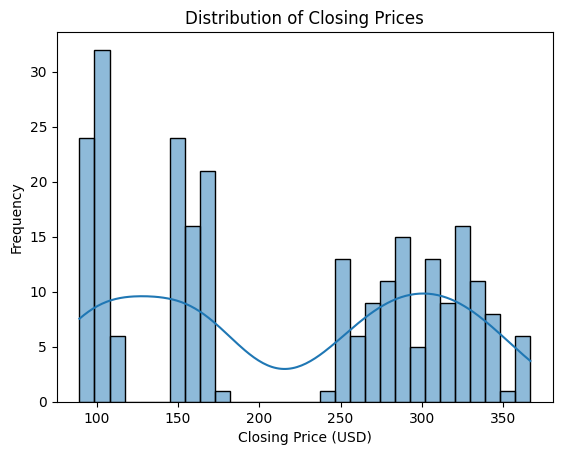

In [11]:
# Distribution of Closing Prices
sns.histplot(data=data, x="Close", kde=True, bins=30)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.show()



/tmp/ipython-input-13-4223049305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Ticker', y='Close', palette='Set2')


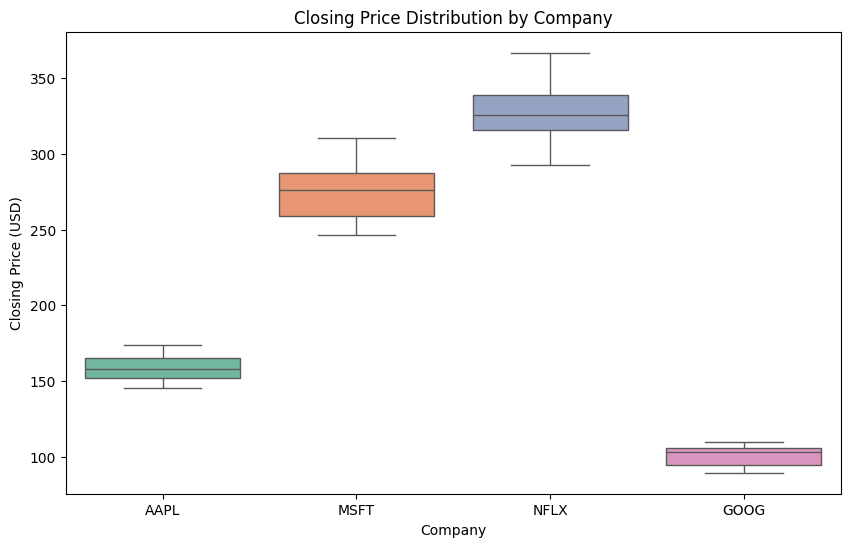

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Ticker', y='Close', palette='Set2')
plt.title('Closing Price Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Closing Price (USD)')
plt.show()

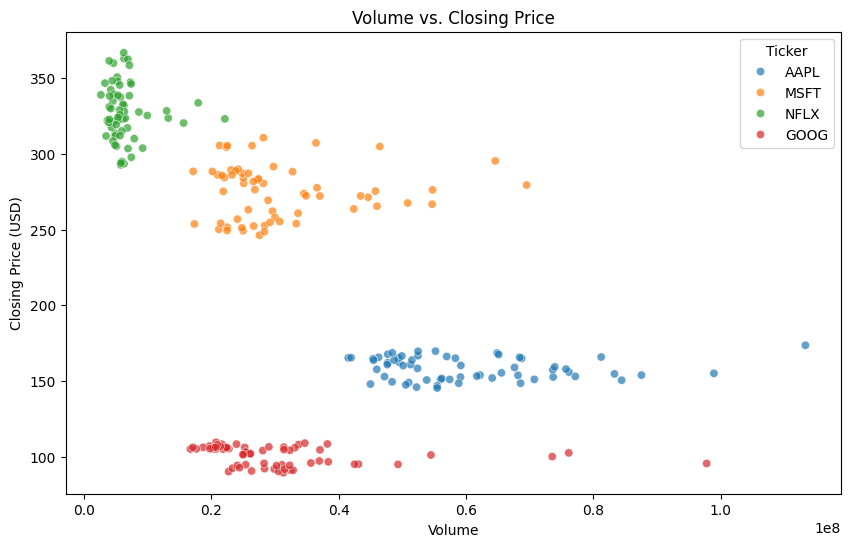

In [15]:
# 🔍 Volume vs. Closing Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Volume', y='Close', hue='Ticker', alpha=0.7)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.show()

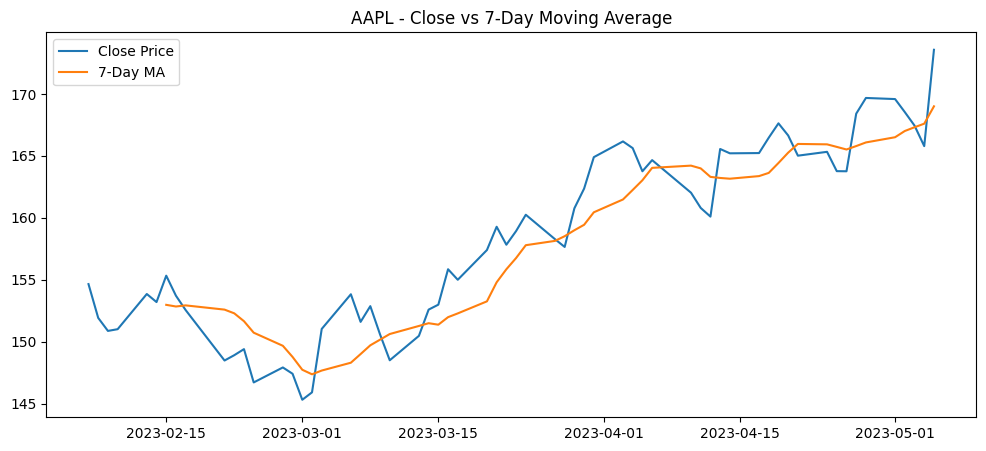

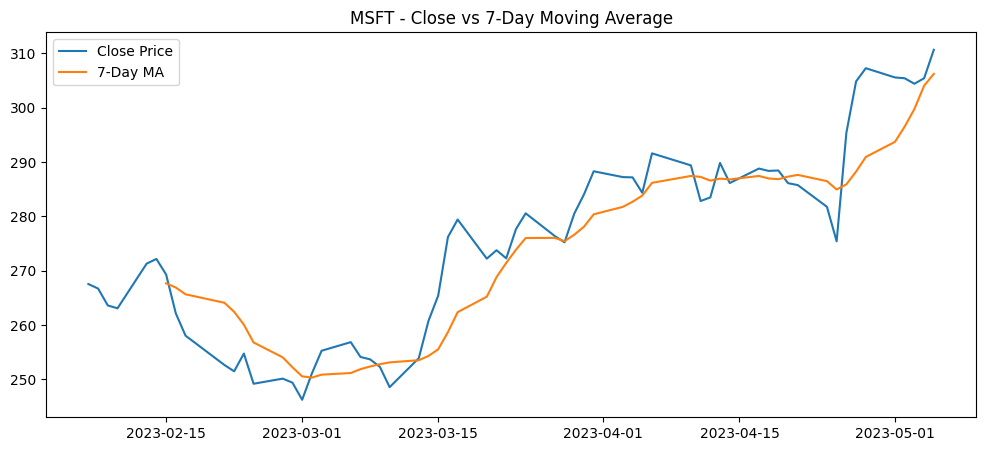

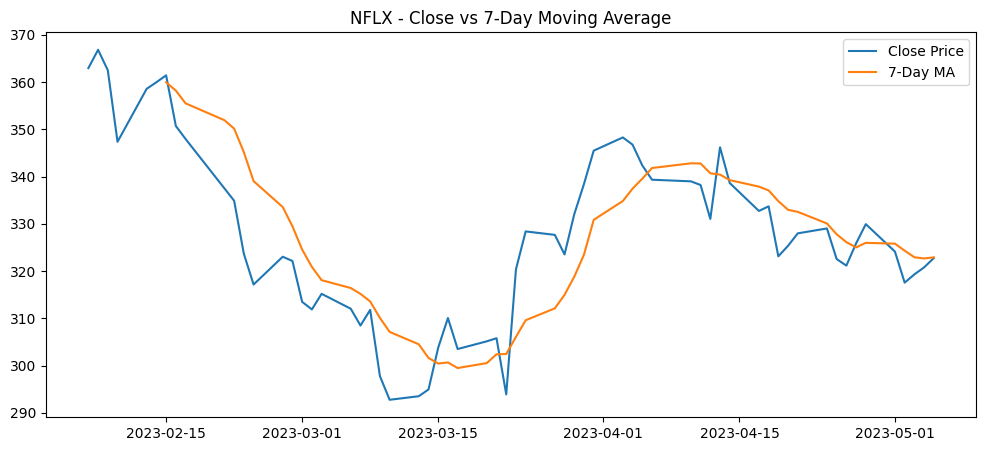

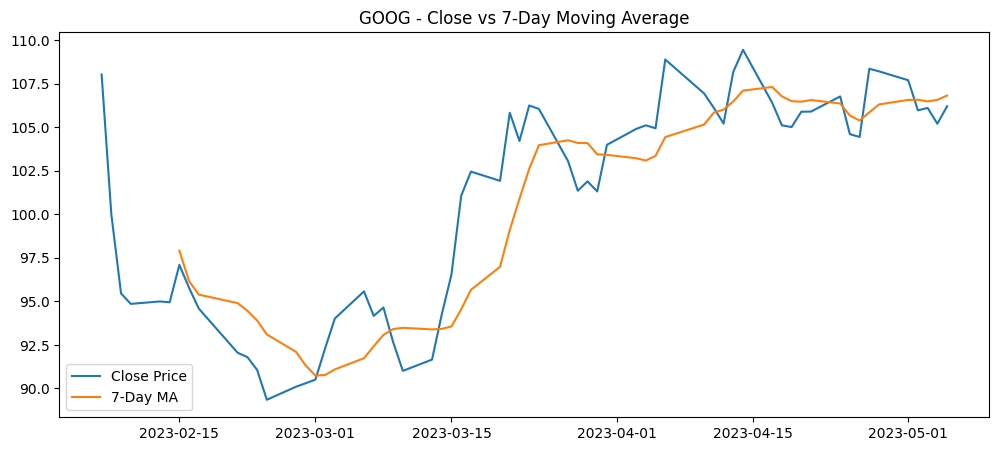

In [17]:
# 🔁 Moving Averages and Volatility
for ticker in data['Ticker'].unique():
    stock = data[data['Ticker'] == ticker].copy()
    stock.set_index('Date', inplace=True)
    stock['7D MA'] = stock['Close'].rolling(window=7).mean()
    stock['Volatility'] = stock['Close'].rolling(window=7).std()

    plt.figure(figsize=(12, 5))
    plt.plot(stock['Close'], label='Close Price')
    plt.plot(stock['7D MA'], label='7-Day MA')
    plt.title(f'{ticker} - Close vs 7-Day Moving Average')
    plt.legend()
    plt.show()



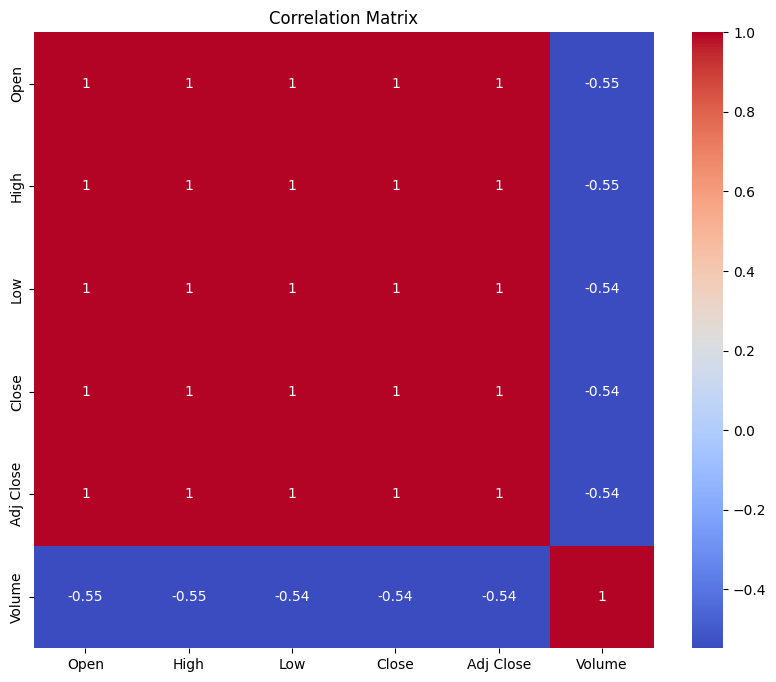

In [19]:
# 🔗 Correlation Matrix
correlation_matrix = data.drop(columns=['Ticker', 'Date']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
